In [3]:
#Installing packages and loading them into the enviroment
install.packages("caret")
library("caret")
install.packages("mice")
library("mice")
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpcHezfh\downloaded_packages


Loading required package: lattice

Loading required package: ggplot2

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
     binary source needs_compilation
mice  3.9.0 3.10.0              TRUE

  Binaries will be installed
package 'mice' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mice'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\mice\libs\x64\mice.dll to C:\Users\2198K\Documents\R\win-library\3.6\mice\libs\x64\mice.dll: Permission denied"
Warning message:
"restored 'mice'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpcHezfh\downloaded_packages



Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpcHezfh\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpcHezfh\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpcHezfh\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
x dplyr::select() masks MASS::select()



In [4]:
#Loading all needed files,dropping first two coloumns, which are not needed for analysis (ID, species)
ionomics <- read.csv('spec_woAestVulp_shoot_xyz_concat.csv', colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
hybrids <- read.csv('spec_shoot_xyz_concat_unk_only.csv', colClasses = c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))

#Imputation via missMDA
imputeIonomics <- imputePCA(ionomics, method = "Regularized")

In [5]:
#Imputation via Mice
# TODO add in fit graphics and missing data quantification
temp <- mice(ionomics, m = 1, maxit = 5, method = "norm.boot", seed = 123)
ionomicsComplete <- complete(temp,1)


 iter imp variable
  1   1  S34_X  As75_X
  2   1  S34_X  As75_X
  3   1  S34_X  As75_X
  4   1  S34_X  As75_X
  5   1  S34_X  As75_X


In [6]:
#data imputed with missMDA regularized method
mean.impute <- 0 #Start our average with 0
for (x in 1:10000){ # run 10000 permutations
    set.seed(x) #cycle through many random generator seeds
    training.samples.impute <- imputeIonomics$completeObs[,2] %>%
        createDataPartition(p = 0.8, list = FALSE) #split the data into training (80%) and testing (20%)
    train.data.impute <- imputeIonomics$completeObs[training.samples.impute, ] #generate training set
    test.data.impute <- imputeIonomics$completeObs[-training.samples.impute, ] #generate test set
    train.data.impute <- unlist(train.data.impute) #typecast from matrix into dataframe
    test.data.impute <- unlist(test.data.impute)
    train.data.impute <- as.data.frame(train.data.impute)
    test.data.impute <- as.data.frame(test.data.impute)
    model.impute <- lda(spec_as_int~., data = train.data.impute) #generate the LDA model
    predictions.impute <- model.impute %>% predict(test.data.impute) #predict the species of individuals in our test set based off of this model
    mean.impute = mean.impute + mean(predictions.impute$class==test.data.impute$spec_as_int) #measure how often this prediction is correct, then add it to a running total
}
mean.impute = mean.impute/9999 #divide running total by number of runs to find our average
mean.impute #print this average to the screen

#data imputed with mice, norm.boot method
mean.mice = 0 #Start our average with 0
for (x in 1:10000){ #run 10000 permutations
    set.seed(x)  #cycle through many random generator seeds
    training.samples.mice <- ionomicsComplete[,2] %>%
        createDataPartition(p = 0.8, list = FALSE) #split the data into training (80%) and testing (20%)
    train.data.mice <- ionomicsComplete[training.samples.mice, ] #generate training set
    test.data.mice <- ionomicsComplete[-training.samples.mice, ] #generate test set
    model.mice <- lda(spec_as_int~., data = train.data.mice) #generate the LDA model
    predictions.mice <- model.mice %>% predict(test.data.mice) #predict the species of individuals in our test set based off of this model
    mean.mice = mean.mice + mean(predictions.mice$class==test.data.mice$spec_as_int) #measure how often this prediction is correct, then add it to a running total
}
mean.mice = mean.mice/9999 #divide running total by number of runs to find our average
mean.mice #print this average to the screen

[1] 0.8031275

[1] 0.8029803

|species|spec_as_int|
|---|---|
|acerifolia_x|1|
|cinerea_x|3|
|labrusca_x|4|
|riparia_x|6|
|rupestris_x|7|
|vulpina_x|8|

In [7]:
df.impute <- as.data.frame(unlist(imputeIonomics$completeObs))
lda.impute <- lda(spec_as_int~., data = df.impute)
pred.impute <- predict(lda.impute)
pred.hybrids <- lda.impute %>% predict(hybrids)

In [8]:
viz.impute <- data.frame(spec = df.impute[1], lda = pred.impute$x)
viz.hybrids <- data.frame(spec = hybrids[1], lda = pred.hybrids$x)
#viz.impute$spec = as.factor(viz.impute$spec)
#viz.hybrids$spec = as.factor(viz.hybrids$spec)

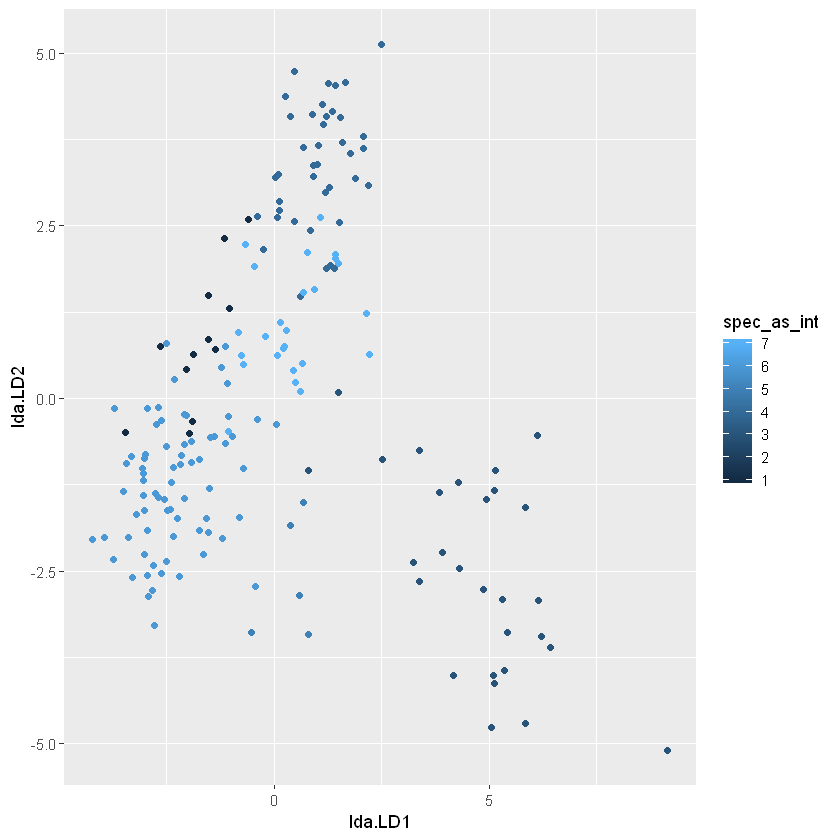

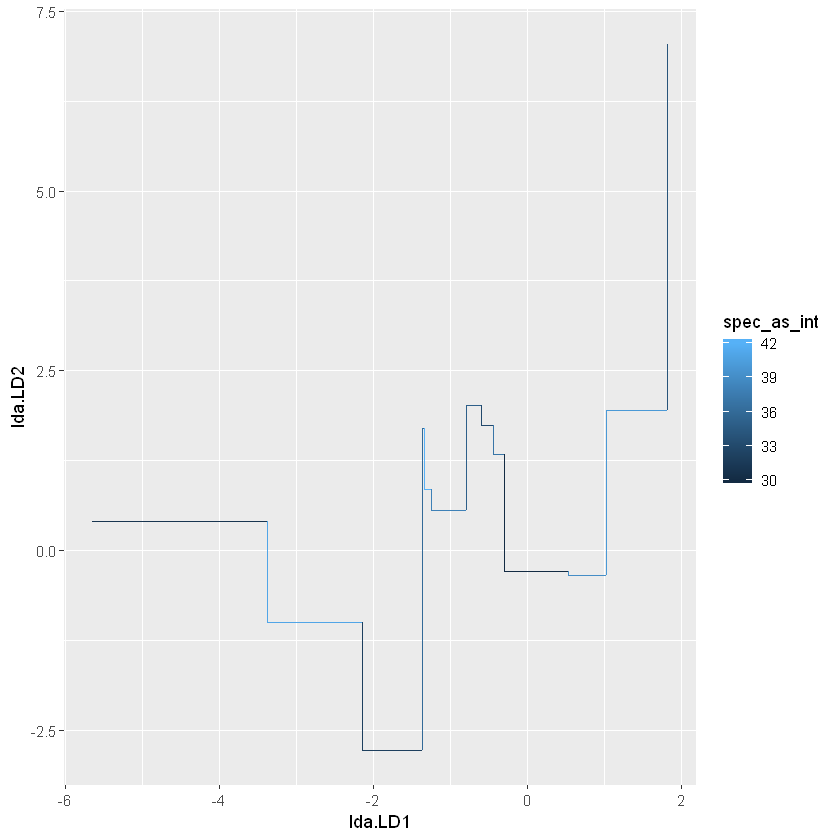

In [9]:
p <- ggplot(data = NULL) 
p + geom_point(data = viz.impute, aes(x = lda.LD1, y = lda.LD2, color = spec_as_int)) 
p + geom_step(data = viz.hybrids, aes(x = lda.LD1, y = lda.LD2, color = spec_as_int))

In [10]:
# Split the data into training (80%) and test set (20%)
#data set imputed via mice
set.seed(321)
training.samples <- ionomicsComplete[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomicsComplete[training.samples, ]
test.data <- ionomicsComplete[-training.samples, ]

In [11]:
#unimputed
training.samples.raw <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data.raw <- ionomics[training.samples.raw, ]
test.data.raw <- ionomics[-training.samples.raw, ]

In [12]:
#data set imputed via missMDA
training.samples.impute <- imputeIonomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data.impute <- imputeIonomics$completeObs[training.samples.impute, ]
test.data.impute <- imputeIonomics$completeObs[-training.samples.impute, ]
#typecasting from matrix to dataframe
train.data.impute <- unlist(train.data.impute)
test.data.impute <- unlist(test.data.impute)
train.data.impute <- as.data.frame(train.data.impute)
test.data.impute <- as.data.frame(test.data.impute)

In [13]:
# Fit the model
#data set imputed with mice
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 0.7777778

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
         1          3          4          5          6          7 
0.06896552 0.14482759 0.23448276 0.02758621 0.40000000 0.12413793 

Group means:
        B11_X       B11_Y      B11_Z      Na23_X     Na23_Y      Na23_Z
1 -0.06673392 -0.42511432 -0.1999269 -0.06424222 -0.6070225  0.24616908
3  0.14435965  0.07748058 -0.4267488  1.89545233 -0.0814829 -0.42903845
4  0.31589644 -0.37707652 -0.3886809  1.01155057 -0.4361707 -0.26025282
5  2.24364854 -0.74424253 -1.0127732  2.30756475 -0.4241012  0.03447511
6  0.54479771 -0.18406432  0.2052519  0.52083399 -0.6238414 -0.09147639
7  0.67049392 -0.18408910  0.1770790  0.38679990 -0.7587624 -0.46774405
      Mg26_X      Mg26_Y      Mg26_Z     Al27_X      Al27_Y      Al27_Z
1 -0.8156293 -0.70682939 1.108178905  0.1934996 -0.88691245  0.74794683
3 -0.5206042 -0.20362254 0.827596073  0.3468838  0.09988577  0.60297091
4 -0.5361893 -0.04063933 2.193324024  0.2218165 -0.645

In [14]:
#unimputed
model.raw <- lda(spec_as_int~., data = train.data.raw)
# Make predictions
predictions.raw <- model.raw %>% predict(test.data.raw)
# Model accuracy
mean(predictions.raw$class==test.data.raw$spec_as_int)
model.raw

[1] 0.8611111

Call:
lda(spec_as_int ~ ., data = train.data.raw)

Prior probabilities of groups:
         1          3          4          5          6          7 
0.07857143 0.15714286 0.22142857 0.02857143 0.36428571 0.15000000 

Group means:
       B11_X      B11_Y      B11_Z      Na23_X      Na23_Y      Na23_Z
1 -0.1725667 -0.4349772 -0.1933973 -0.01825718 -0.56506175  0.34066876
3 -0.0950251 -0.1182435 -0.4542397  1.78871661 -0.09315629 -0.42566282
4  0.4966769 -0.3320429 -0.4132735  1.25013734 -0.37667308 -0.24947559
5  2.2436485 -0.7442425 -1.0127732  2.30756475 -0.42410121  0.03447511
6  0.7666560 -0.1848731  0.2155335  0.67088506 -0.64623458 -0.15816868
7  0.3268519 -0.1570784  0.1832274  0.31897314 -0.71856623 -0.40238023
      Mg26_X      Mg26_Y      Mg26_Z      Al27_X      Al27_Y      Al27_Z
1 -0.8339243 -0.72296622 1.114068359  0.17237727 -0.87184411  0.72733249
3 -0.5260498 -0.18222361 0.919015306  0.21147630  0.01367967  0.64053475
4 -0.5522742 -0.01634868 2.244298003  0.13864584 -0.64

In [15]:
#data set imputed with missMDA
model.impute <- lda(spec_as_int~., data = train.data.impute)
# Make predictions
predictions.impute <- model.impute %>% predict(test.data.impute)
# Model accuracy
mean(predictions.impute$class == test.data.impute$spec_as_int)
model.impute
#TODO format data generated by model

[1] 0.8055556

Call:
lda(spec_as_int ~ ., data = train.data.impute)

Prior probabilities of groups:
         1          3          4          5          6          7 
0.06206897 0.13793103 0.20689655 0.02758621 0.40689655 0.15862069 

Group means:
        B11_X      B11_Y      B11_Z     Na23_X     Na23_Y      Na23_Z
1  0.03168390 -0.3874852 -0.1766566 0.01053204 -0.5321411  0.32877679
3 -0.09409356 -0.1048108 -0.4624473 1.39364740 -0.1606088 -0.41352417
4  0.37614722 -0.3747406 -0.3546842 1.11052929 -0.4543561 -0.26758605
5  1.41072299 -0.7895389 -0.8568178 2.00122290 -0.4843097 -0.09311516
6  0.72447407 -0.2093128  0.1915147 0.47029881 -0.6768956 -0.11663163
7  0.32534505 -0.1817851  0.1575830 0.28576371 -0.7417573 -0.40705732
      Mg26_X      Mg26_Y    Mg26_Z      Al27_X       Al27_Y      Al27_Z
1 -0.8080544 -0.69674144 1.0812998  0.29433964 -0.878525973  0.68436587
3 -0.5447499 -0.13691666 0.9303370  0.14696762  0.200641397  0.56844397
4 -0.5356960 -0.00467936 2.3001192  0.24391981 -0.626542764  

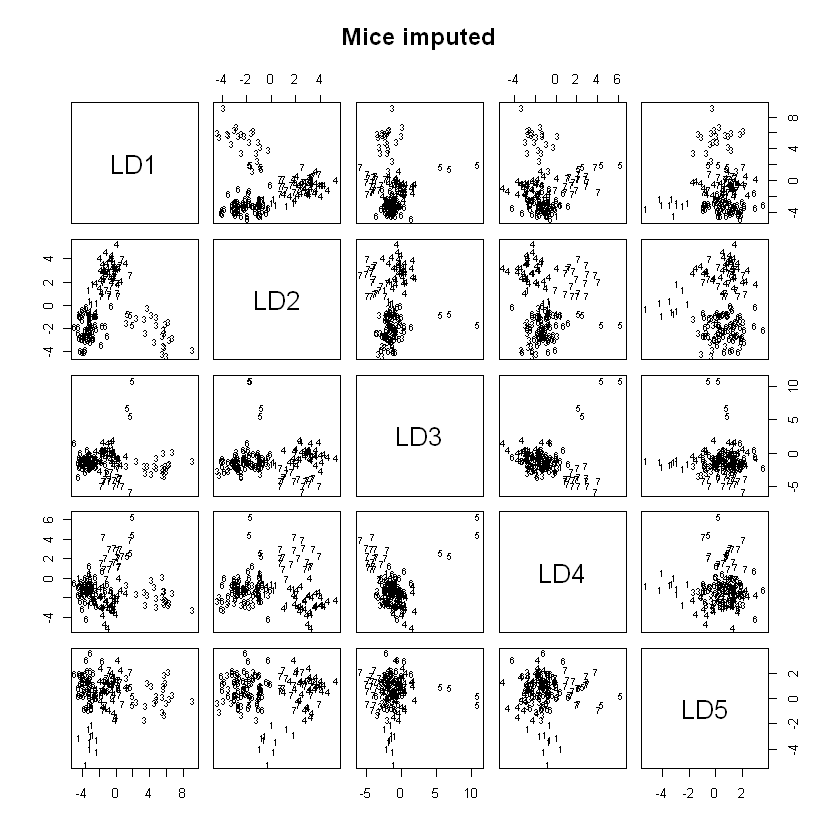

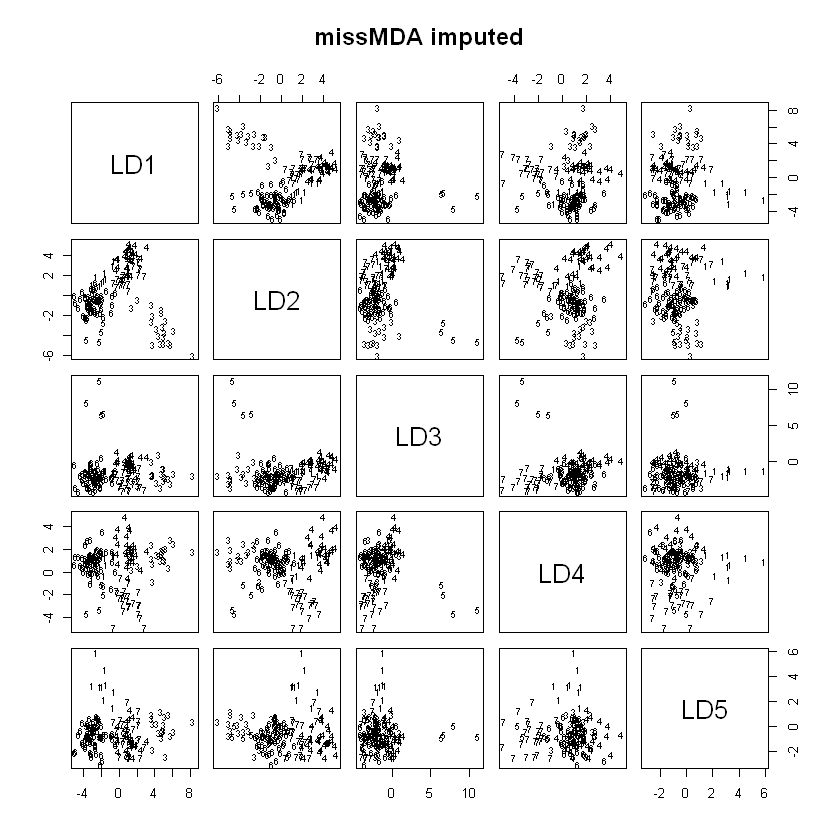

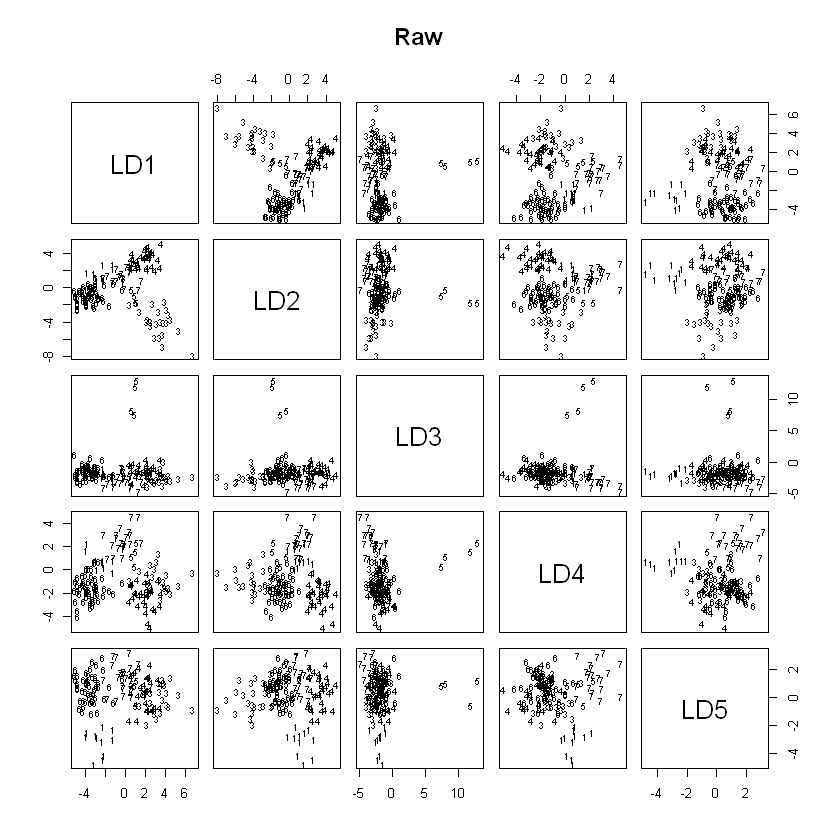

In [16]:
plot(model,main = "Mice imputed")
plot(model.impute, main = "missMDA imputed")
plot(model.raw, main = "Raw")
#TODO a better way to do this 

In [17]:
#mice imputed data
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3)

[1] 1 1 3 6 7 3
Levels: 1 3 4 5 6 7

,1,3,4,5,6,7
8,9.999990e-01,3.741076e-25,2.123315e-07,4.604414e-46,8.191077e-07,5.986524e-11
11,9.566107e-01,1.977336e-16,3.400334e-10,2.794012e-49,4.338929e-02,5.930293e-12
15,3.948992e-20,1.000000e+00,1.629833e-18,1.078000e-29,1.046586e-18,3.132820e-16
19,3.155650e-01,1.212531e-02,8.965905e-03,2.880892e-30,6.633438e-01,3.459347e-13
24,1.066655e-08,5.626851e-10,1.319737e-03,2.422990e-42,3.993896e-03,9.946864e-01
26,8.709972e-18,8.228845e-01,1.756169e-02,1.785703e-29,3.895880e-16,1.595538e-01


,LD1,LD2,LD3,LD4,LD5
8,-3.367054,1.860722,-1.1991571,-0.7408171,-4.101099
11,-2.517907,-1.907840,-2.5733696,-1.8400625,-3.369368
15,6.945168,-2.377669,-0.1584794,0.9041557,-1.736342


In [18]:
#missMDA imputed data
# Predicted classes
head(predictions.impute$class, 6)
# Predicted probabilities of class memebership.
head(predictions.impute$posterior, 6) 
# Linear discriminants
head(predictions.impute$x, 3)

[1] 1 1 6 3 4 3
Levels: 1 3 4 5 6 7

,1,3,4,5,6,7
1,9.999906e-01,4.262419e-16,6.003727e-06,1.968093e-33,3.343119e-06,5.484114e-09
2,8.872982e-01,3.330784e-15,1.216794e-09,1.690362e-21,1.127015e-01,2.993355e-07
3,1.789462e-01,1.394262e-12,5.728805e-11,4.792595e-38,8.210537e-01,1.103199e-07
4,8.811188e-05,8.172274e-01,5.687068e-05,1.654784e-24,1.826277e-01,1.136879e-13
5,7.019374e-03,7.391900e-07,7.653406e-01,5.047621e-33,1.977775e-01,2.986179e-02
6,6.127168e-16,9.828172e-01,7.470697e-09,6.153238e-28,4.624496e-14,1.718283e-02


,LD1,LD2,LD3,LD4,LD5
1,-0.7123019,1.591002,0.5090403,0.9562007,3.936929
2,-2.5168736,-0.817113,0.8424883,-1.0451855,3.185577
3,-2.0357912,-1.164784,-2.6359738,0.5635707,3.146898


In [19]:
#raw data
# Predicted classes
head(predictions.raw$class, 6)
# Predicted probabilities of class memebership.
head(predictions.raw$posterior, 6) 
# Linear discriminants
head(predictions.raw$x, 3)

[1] 1 3 7 3 3 3
Levels: 1 3 4 5 6 7

,1,3,4,5,6,7
11,8.812150e-01,1.755868e-13,4.047951e-11,6.177069e-48,1.187452e-01,3.983565e-05
15,2.746631e-15,1.000000e+00,1.913958e-12,7.705183e-26,1.130487e-10,1.068812e-10
24,8.839663e-08,6.759861e-08,3.849380e-01,4.703590e-43,8.681965e-04,6.141937e-01
26,2.052747e-17,6.979154e-01,4.187949e-05,2.083197e-34,3.631306e-20,3.020427e-01
29,3.113882e-18,1.000000e+00,1.245786e-18,7.868575e-28,1.719959e-15,9.218115e-11
30,4.436291e-24,1.000000e+00,1.285234e-14,6.175788e-09,1.772657e-19,9.522632e-16


,LD1,LD2,LD3,LD4,LD5
11,-2.923936,-0.261389,-2.264832,0.9503677,-2.3142340
15,3.313691,-4.054841,1.458288,0.7897849,-0.1271137
24,1.030002,1.419772,-2.027640,-0.1507277,1.8464173


In [20]:
#raw data
table.raw <- table(Predicted=predictions.raw$class, Species=test.data.raw$spec_as_int)
confusionMatrix(table.raw)

Confusion Matrix and Statistics

         Species
Predicted  1  3  4  5  6  7
        1  1  0  0  0  0  0
        3  0  5  0  0  0  0
        4  0  0  9  0  2  0
        5  0  0  0  0  0  0
        6  0  0  0  1 14  1
        7  0  1  0  0  0  2

Overall Statistics
                                         
               Accuracy : 0.8611         
                 95% CI : (0.705, 0.9533)
    No Information Rate : 0.4444         
    P-Value [Acc > NIR] : 2.744e-07      
                                         
                  Kappa : 0.8002         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 3 Class: 4 Class: 5 Class: 6 Class: 7
Sensitivity           1.00000   0.8333   1.0000  0.00000   0.8750  0.66667
Specificity           1.00000   1.0000   0.9259  1.00000   0.9000  0.96970
Pos Pred Value        1.00000   1.0000   0.8182      NaN   0.8750  0.66667
Neg Pred Value        1.00000   0

In [21]:
#missMDA data
table.impute <- table(Predicted=predictions.impute$class, Species=test.data.impute$spec_as_int)
con <- confusionMatrix(table.impute)
names(con)
names(con$overall)

[1] "positive" "table"    "overall"  "byClass"  "mode"     "dots"

[1] "Accuracy"       "Kappa"          "AccuracyLower"  "AccuracyUpper" 
[5] "AccuracyNull"   "AccuracyPValue" "McnemarPValue"

In [22]:
#mice data
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
confusionMatrix(table)

Confusion Matrix and Statistics

         Species
Predicted  1  3  4  5  6  7
        1  2  0  0  1  0  0
        3  0  4  0  0  0  0
        4  0  0  6  0  1  0
        5  0  0  0  0  0  0
        6  0  2  0  0 11  2
        7  0  1  0  0  1  5

Overall Statistics
                                          
               Accuracy : 0.7778          
                 95% CI : (0.6085, 0.8988)
    No Information Rate : 0.3611          
    P-Value [Acc > NIR] : 4.071e-07       
                                          
                  Kappa : 0.7049          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 3 Class: 4 Class: 5 Class: 6 Class: 7
Sensitivity           1.00000   0.5714   1.0000  0.00000   0.8462   0.7143
Specificity           0.97059   1.0000   0.9667  1.00000   0.8261   0.9310
Pos Pred Value        0.66667   1.0000   0.8571      NaN   0.7333   0.7143
Neg Pred Value        1.